In [1]:
import xarray as xr           #----xarray is used to open and read and manage .nc files
import numpy as np            #--------we can perform various calculations using 'numpy' 
import cartopy.crs as ccrs    
import cartopy.feature as cf
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from netCDF4 import Dataset
from scipy import stats
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib import pyplot as plt
#import statsmodels.api as sm
from scipy import signal
import regionmask
import geopandas as gpd

In [2]:
ds = xr.open_dataset('UKMO_AprIC.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 36, number: 28, time: 96)
Coordinates:
  * longitude  (longitude) float32 60.0 61.0 62.0 63.0 ... 97.0 98.0 99.0 100.0
  * latitude   (latitude) float32 40.0 39.0 38.0 37.0 36.0 ... 8.0 7.0 6.0 5.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27
  * time       (time) datetime64[ns] 1993-06-01 1993-07-01 ... 2016-09-01
Data variables:
    tprate     (time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-19 05:55:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
lon = ds['longitude'][:]  
lat = ds['latitude'][:] 
prcp=ds['tprate'].mean(axis=1)# For averaging the ensemble members
print(prcp.shape)

(96, 36, 41)


In [4]:
r_jun=prcp.sel(time=np.in1d(prcp['time.month'], [6]))
r_JUN=r_jun.to_numpy()
print(r_JUN.shape)
r_JUN=r_JUN*2592000000 # unit Conversion from m/s to mm i.e. 60 x 60 x 24 x 30 x 1000

r_jul=prcp.sel(time=np.in1d(prcp['time.month'], [7]))
r_JUL=r_jul.to_numpy()
print(r_JUL.shape)
r_JUL=r_JUL*2678400000 #60 x 60 x 24 x 31x 1000

r_aug=prcp.sel(time=np.in1d(prcp['time.month'], [8]))
r_AUG=r_aug.to_numpy()
print(r_AUG.shape)
r_AUG=r_AUG*2678400000 #60 x 60 x 24 x 31x 1000

r_sep=prcp.sel(time=np.in1d(prcp['time.month'], [9]))
r_SEP=r_sep.to_numpy()
print(r_SEP.shape)
r_SEP=r_SEP*2592000000 #60 x 60 x 24 x 30 x 1000

(24, 36, 41)
(24, 36, 41)
(24, 36, 41)
(24, 36, 41)


In [5]:
#JJAS season
JJAS=r_JUN+r_JUL+r_AUG+r_SEP
print(JJAS.shape)

(24, 36, 41)


In [6]:
ds1 = xr.open_dataset('rf_JJAS_1951_2022.nc')
# --- Define 'lons','lats' variables
lons = ds1['LONGITUDE'][:]  
lats = ds1['LATITUDE'][:] 
# --- select JJAS months
fname='Homogeneous Region Shape File1 (1)/Homogeneous Region Shape File1.shp'
#rf = ds1['RAINFALL'].sel(TIME=np.in1d(ds1['TIME.month'], [6, 7, 8, 9]))
#Prepare JJAS 1993-2016 
#r=ds1['RAINFALL'][168:264,:,:]
#r

In [7]:
# Regrid the model data to match the grid of the observation data
rf_reg = ds1.interp(LATITUDE=prcp.latitude, LONGITUDE=prcp.longitude, method='linear')

# Now both datasets have the same latitudes and longitudes
rf_reg

<xarray.Dataset>
Dimensions:    (TIME: 288, latitude: 36, longitude: 41)
Coordinates:
  * TIME       (TIME) datetime64[ns] 1951-06-15T12:00:00 ... 2022-09-15T12:00:00
    LATITUDE   (latitude) float32 40.0 39.0 38.0 37.0 36.0 ... 8.0 7.0 6.0 5.0
    LONGITUDE  (longitude) float32 60.0 61.0 62.0 63.0 ... 97.0 98.0 99.0 100.0
  * latitude   (latitude) float32 40.0 39.0 38.0 37.0 36.0 ... 8.0 7.0 6.0 5.0
  * longitude  (longitude) float32 60.0 61.0 62.0 63.0 ... 97.0 98.0 99.0 100.0
Data variables:
    RAINFALL   (TIME, latitude, longitude) float64 nan nan nan ... nan nan nan

In [8]:
r=rf_reg['RAINFALL'][168:264,:,:]
r

<xarray.DataArray 'RAINFALL' (TIME: 96, latitude: 36, longitude: 41)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * TIME       (TIME) datetime64[ns] 1993-06-15T12:00:00 ... 2016-09-15T12:00:00
    LATITUDE   (latitude) float32 40.0 39.0 38.0 37.0 36.0 ... 8.0 7.0 6.0 5.0
    LONGITUDE  (longitude) float32 60.0 61.0 62.0 63.0 ... 97.0 98.0 99.0 100.0
  * latitude   (latitude) float32 40.0 39.0 38.0 37.0 36.0 ... 8.0 7.0 6.0 5.0
  * longitude  (longitude) float32 60.0 61.0 62.0 63.0 ... 97.0 98.0 99.0 100.0
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1901_rfp25.grd

In [9]:
jun=r.sel(TIME=np.in1d(r['TIME.month'], [6]))
JUN=jun.to_numpy()
print(JUN.shape)

jul=r.sel(TIME=np.in1d(r['TIME.month'], [7]))
JUL=jul.to_numpy()
print(JUL.shape)

aug=r.sel(TIME=np.in1d(r['TIME.month'], [8]))
aug
AUG=aug.to_numpy()
print(AUG.shape)

sep=r.sel(TIME=np.in1d(r['TIME.month'], [9]))
sep
SEP=sep.to_numpy()
SEP
print(SEP.shape)

(24, 36, 41)
(24, 36, 41)
(24, 36, 41)
(24, 36, 41)


In [10]:
#JJAS season
JJAS2=JUN+JUL+AUG+SEP
print(JJAS2.shape)

(24, 36, 41)


In [11]:
# Initialize correlation matrix to store results
# corr_matrix = np.zeros((36, 41))

# Calculate correlation coefficient for each (lat, lon) pair
# for i in range(36):
    # for j in range(41):
        # Select time series data for the current (lat, lon) pair
        # data1 = JJAS[:, i, j]
        # data2 = JJAS2[:, i, j]
        
        # Compute correlation coefficient
        # corr_matrix[i, j] = np.corrcoef(data1, data2)[0, 1]

# corr_matrix now contains the correlation coefficients for each (lat, lon) pair
# print(corr_matrix.shape)

(36, 41)


In [13]:
#Spatial correlation
cr=np.empty((2,36,41))
for i in range(0,36):
    for j in range(0,41):
        cr[:,i,j]=stats.spearmanr(JJAS[:,i,j],JJAS2[:,i,j])
print(cr.shape)

(2, 36, 41)


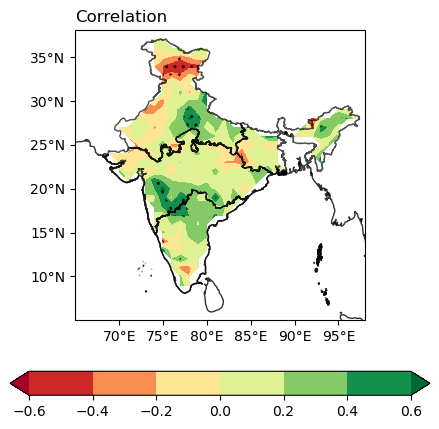

In [17]:
# Panel Plot 
fig, (ax1) = plt.subplots(1,1, figsize=(10, 5),subplot_kw={"projection": ccrs.PlateCarree()})

ax1.set_title('Correlation',fontsize=12, loc='left')
clevs = [-0.6,-0.4,-0.2,0,0.2,0.4,0.6]
cf1 = ax1.contourf(lon,lat,cr[0],clevs,extend='both',transform=ccrs.PlateCarree(),
                   cmap=plt.cm.RdYlGn)
ax1.coastlines(alpha=0.8)
ax1.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.7)
ax1.set_xticks([70,75,80,85,90,95], crs=ccrs.PlateCarree())
ax1.set_yticks([10,15,20,25,30,35], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_extent([65, 98,5 ,37])
ax1.contourf(lon, lat, cr[1],levels=np.arange(0, 0.1, 0.01),
            transform=ccrs.PlateCarree(), hatches=['..'], alpha=0)


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3,top=0.88,left=0.2,right=0.9,wspace=-0.25,hspace=0.37)
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.34, 0.15, 0.42, 0.048])

# Draw the colorbar
cbar=fig.colorbar(cf1, cax=cbar_ax,orientation='horizontal')
#plt.text(280, -3, '(%)', fontsize = 11,rotation=90)#mm month$^-$$^1$)
#plt.text(-1690, -140, '(Clim:1991-2020)', fontsize = 11)
#plt.savefig("Model_Obs_Rf_Corr.jpg", dpi=600)
plt.show()